<a href="https://colab.research.google.com/github/ruddypp/Tugas-Akhir-Dicoding/blob/main/%5BClustering%5D_Submission_Akhir_BMLP_Rudy3rd_Ver.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **1. Perkenalan Dataset**


Tahap pertama, Anda harus mencari dan menggunakan dataset **tanpa label** dengan ketentuan sebagai berikut:

1. **Sumber Dataset**:  
   Dataset dapat diperoleh dari berbagai sumber, seperti public repositories (*Kaggle*, *UCI ML Repository*, *Open Data*) atau data primer yang Anda kumpulkan sendiri.
   
2. **Ketentuan Dataset**:
   - **Tanpa label**: Dataset tidak boleh memiliki label atau kelas.
   - **Jumlah Baris**: Minimal 1000 baris untuk memastikan dataset cukup besar untuk analisis yang bermakna.
   - **Tipe Data**: Harus mengandung data **kategorikal** dan **numerikal**.
     - *Kategorikal*: Misalnya jenis kelamin, kategori produk.
     - *Numerikal*: Misalnya usia, pendapatan, harga.

3. **Pembatasan**:  
   Dataset yang sudah digunakan dalam latihan clustering (seperti customer segmentation) tidak boleh digunakan.

In [ ]:
#Type your code here

# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [ ]:
# 2. Import Library yang dibutuhkan
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA

# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

In [ ]:
# 3. Memuat Dataset
# Upload file secara manual
from google.colab import files
uploaded = files.upload()

# Membaca dataset
file_name = list(uploaded.keys())[0]
data = pd.read_csv(file_name)

# Menampilkan beberapa baris dari isi data
data.head()

Saving salary_dataset.csv to salary_dataset (1).csv


,Unnamed: 0,Company Name,Job Title,Salaries Reported,Location,Salary
0,0,Mu Sigma,Data Scientist,105,Bangalore,648573.0
1,1,IBM,Data Scientist,95,Bangalore,1191950.0
2,2,Tata Consultancy Services,Data Scientist,66,Bangalore,836874.0
3,3,Impact Analytics,Data Scientist,40,Bangalore,669578.0
4,4,Accenture,Data Scientist,32,Bangalore,944110.0


# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset. EDA bertujuan untuk:

1. **Memahami Struktur Data**
   - Tinjau jumlah baris dan kolom dalam dataset.  
   - Tinjau jenis data di setiap kolom (numerikal atau kategorikal).

2. **Menangani Data yang Hilang**  
   - Identifikasi dan analisis data yang hilang (*missing values*). Tentukan langkah-langkah yang diperlukan untuk menangani data yang hilang, seperti pengisian atau penghapusan data tersebut.

3. **Analisis Distribusi dan Korelasi**  
   - Analisis distribusi variabel numerik dengan statistik deskriptif dan visualisasi seperti histogram atau boxplot.  
   - Periksa hubungan antara variabel menggunakan matriks korelasi atau scatter plot.

4. **Visualisasi Data**  
   - Buat visualisasi dasar seperti grafik distribusi dan diagram batang untuk variabel kategorikal.  
   - Gunakan heatmap atau pairplot untuk menganalisis korelasi antar variabel.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

Jumlah baris dan kolom: (4339, 6)
Info dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4339 entries, 0 to 4338
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         4339 non-null   int64  
 1   Company Name       4339 non-null   object 
 2   Job Title          4339 non-null   object 
 3   Salaries Reported  4339 non-null   int64  
 4   Location           4339 non-null   object 
 5   Salary             4339 non-null   float64
dtypes: float64(1), int64(2), object(3)
memory usage: 203.5+ KB
None
Jumlah data yang hilang:
Unnamed: 0           0
Company Name         0
Job Title            0
Salaries Reported    0
Location             0
Salary               0
dtype: int64
Statistik deskriptif data numerikal:
        Unnamed: 0  Salaries Reported        Salary
count  4339.000000        4339.000000  4.339000e+03
mean   2169.900899           2.777138  1.119885e+06
std    1253.742778      

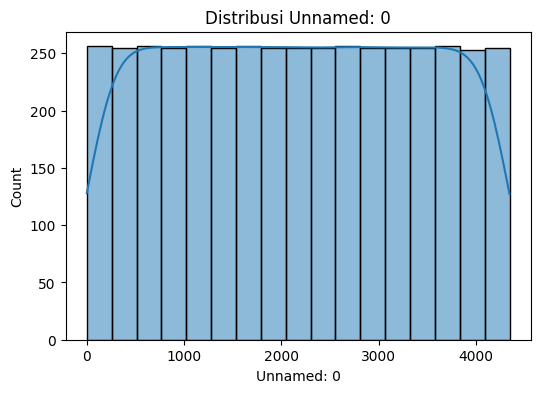

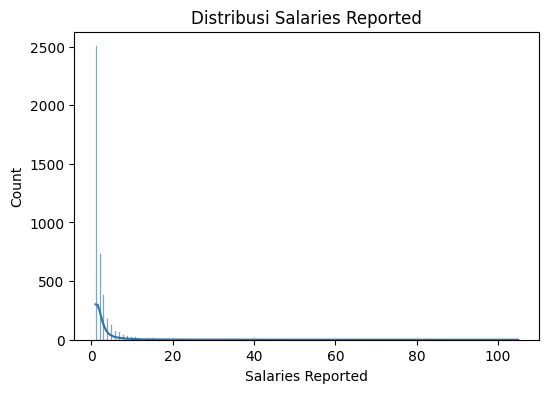

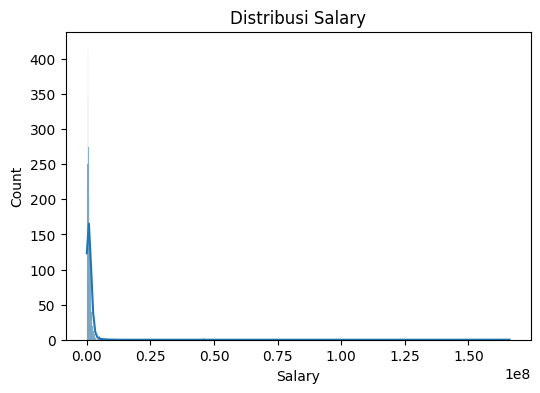

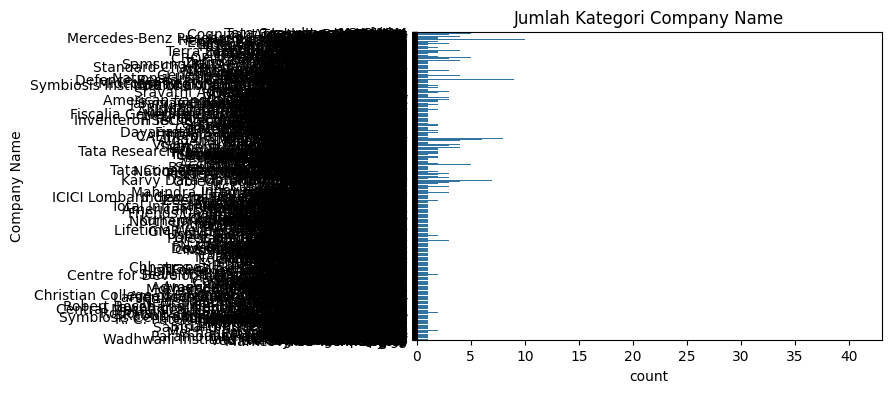

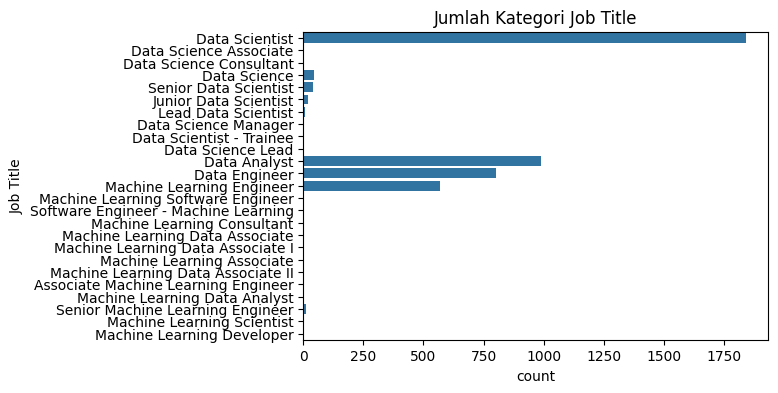

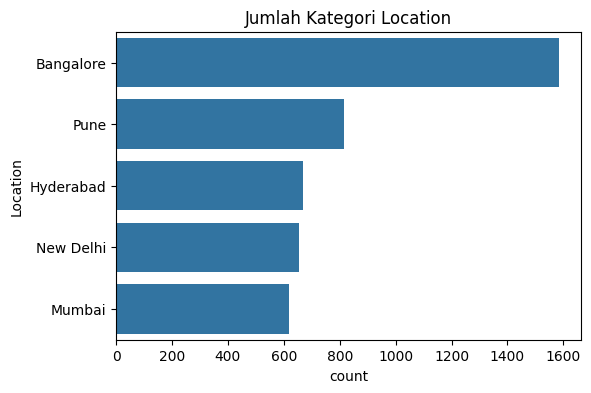

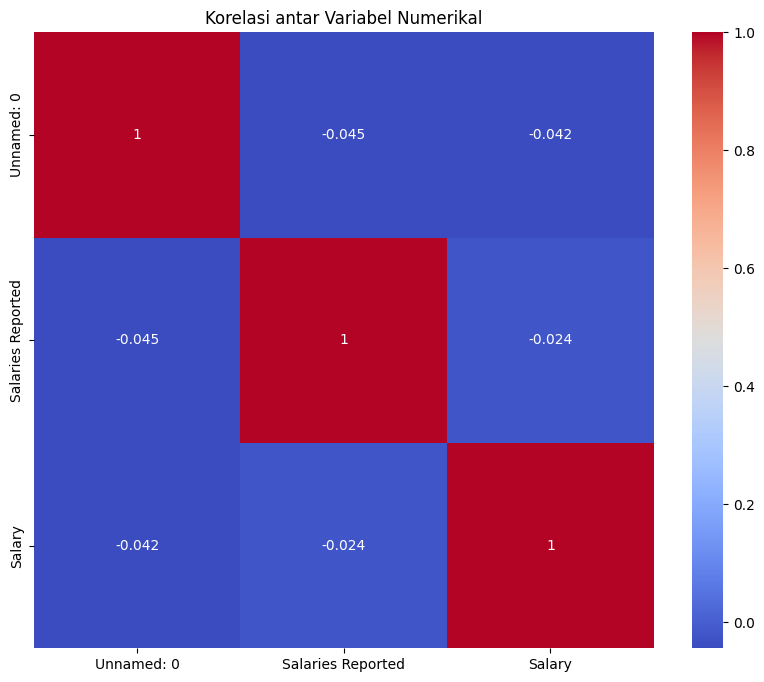

In [ ]:
# 4. Exploratory Data Analysis (EDA)
# Menampilkan Struktur data
print(f"Jumlah baris dan kolom: {data.shape}")
print("Info dataset:")
print(data.info())

# Memeriksa data yang hilang
print("Jumlah data yang hilang:")
print(data.isnull().sum())

# Analisis distribusi variabel dengan Statistik deskriptif
print("Statistik deskriptif data numerikal:")
print(data.describe())

# Visualisasi distribusi variabel numerikal
numerical_cols = data.select_dtypes(include=['int64', 'float64']).columns
for col in numerical_cols:
    plt.figure(figsize=(6, 4))
    sns.histplot(data[col], kde=True)
    plt.title(f'Distribusi {col}')
    plt.show()

# Visualisasi variabel kategorikal
categorical_cols = data.select_dtypes(include=['object']).columns
for col in categorical_cols:
    plt.figure(figsize=(6, 4))
    sns.countplot(y=data[col])
    plt.title(f'Jumlah Kategori {col}')
    plt.show()

# menampilkan heatmap Korelasi antar variabel numerikal
plt.figure(figsize=(10, 8))
sns.heatmap(data[numerical_cols].corr(), annot=True, cmap='coolwarm')
plt.title('Korelasi antar Variabel Numerikal')
plt.show()

# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning. Data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah.

In [ ]:
# 5. Data Preprocessing
# Menangani data yang hilang
data = data.dropna()

# Menghapus data duplikat
data = data.drop_duplicates()

# Encoding data kategorikal
encoder = LabelEncoder()
for col in categorical_cols:
    data[col] = encoder.fit_transform(data[col])

# Normalisasi data numerikal
scaler = StandardScaler()
data[numerical_cols] = scaler.fit_transform(data[numerical_cols])

# **6. Pembangunan Model Clustering**

## **a. Pembangunan Model Clustering**

Pada tahap ini, Anda membangun model clustering dengan memilih algoritma yang sesuai untuk mengelompokkan data berdasarkan kesamaan. Berikut adalah **rekomendasi** tahapannya.
1. Pilih algoritma clustering yang sesuai.
2. Latih model dengan data menggunakan algoritma tersebut.

In [ ]:
# a. Pembangunan Model Clustering

# Memilih algoritma K-Means untuk clustering
sse = []
k_range = range(2, 11)
for k in k_range:
    # Melatih model clustering dengan KMeans
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data)
    sse.append(kmeans.inertia_)

## **b. Evaluasi Model Clustering**

Untuk menentukan jumlah cluster yang optimal dalam model clustering, Anda dapat menggunakan metode Elbow atau Silhouette Score.

Metode ini membantu kita menemukan jumlah cluster yang memberikan pemisahan terbaik antar kelompok data, sehingga model yang dibangun dapat lebih efektif. Berikut adalah **rekomendasi** tahapannya.
1. Gunakan Silhouette Score dan Elbow Method untuk menentukan jumlah cluster optimal.
2. Hitung Silhouette Score sebagai ukuran kualitas cluster.

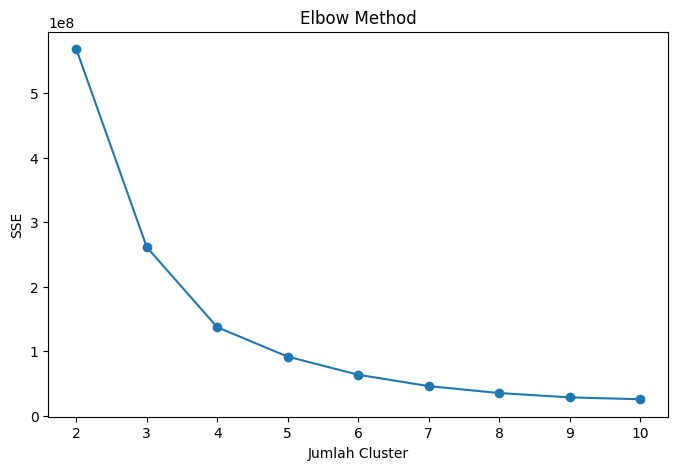

Silhouette Score untuk 3 cluster: 0.5808128477514057


In [ ]:
# b. Evaluasi Model Clustering

# Menentukan jumlah cluster optimal menggunakan Elbow Method
plt.figure(figsize=(8, 5))
plt.plot(k_range, sse, marker='o')
plt.title('Elbow Method')
plt.xlabel('Jumlah Cluster')
plt.ylabel('SSE')
plt.show()

# Menggunakan Silhouette Score
best_k = 3
kmeans = KMeans(n_clusters=best_k, random_state=42)
kmeans.fit(data)
labels = kmeans.labels_

silhouette_avg = silhouette_score(data, labels)
print(f"Silhouette Score untuk {best_k} cluster: {silhouette_avg}")

## **c. Feature Selection (Opsional)**

Silakan lakukan feature selection jika Anda membutuhkan optimasi model clustering. Jika Anda menerapkan proses ini, silakan lakukan pemodelan dan evaluasi kembali menggunakan kolom-kolom hasil feature selection. Terakhir, bandingkan hasil performa model sebelum dan sesudah menerapkan feature selection.

In [ ]:
#Type your code here

## **d. Visualisasi Hasil Clustering**

Setelah model clustering dilatih dan jumlah cluster optimal ditentukan, langkah selanjutnya adalah menampilkan hasil clustering melalui visualisasi.

Berikut adalah **rekomendasi** tahapannya.
1. Tampilkan hasil clustering dalam bentuk visualisasi, seperti grafik scatter plot atau 2D PCA projection.

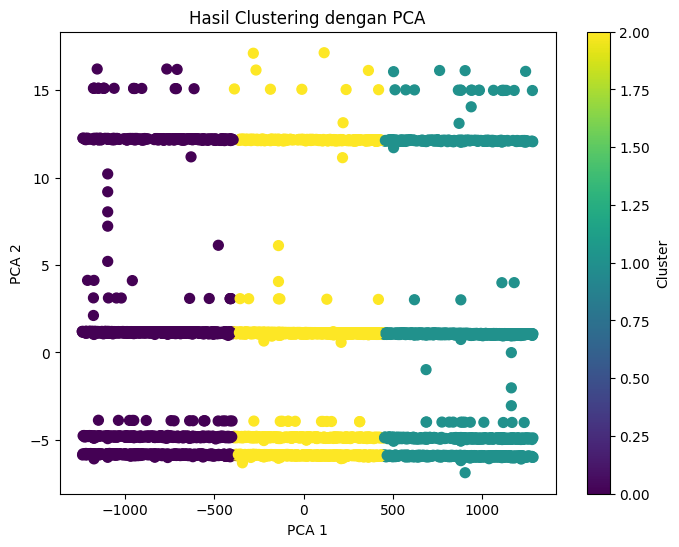

In [ ]:
# d. Visualisasi Hasil Clustering dengan PCA 2d
pca = PCA(n_components=2)
data_pca = pca.fit_transform(data)
plt.figure(figsize=(8, 6))
plt.scatter(data_pca[:, 0], data_pca[:, 1], c=labels, cmap='viridis', s=50)
plt.title('Hasil Clustering dengan PCA')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.colorbar(label='Cluster')
plt.show()


## **e. Analisis dan Interpretasi Hasil Cluster**

Setelah melakukan clustering, langkah selanjutnya adalah menganalisis karakteristik dari masing-masing cluster berdasarkan fitur yang tersedia.

Berikut adalah **rekomendasi** tahapannya.
1. Analisis karakteristik tiap cluster berdasarkan fitur yang tersedia (misalnya, distribusi nilai dalam cluster).
2. Berikan interpretasi: Apakah hasil clustering sesuai dengan ekspektasi dan logika bisnis? Apakah ada pola tertentu yang bisa dimanfaatkan?

In [ ]:
# e. Analisis dan Interpretasi Hasil Cluster
cluster_summary = pd.DataFrame(data, columns=data.columns)
cluster_summary['Cluster'] = labels
for i in range(best_k):
    print(f"Cluster {i}:")
    print(cluster_summary[cluster_summary['Cluster'] == i].mean())

Cluster 0:
Unnamed: 0             0.023219
Company Name         439.461082
Job Title              6.800792
Salaries Reported      0.019973
Location               1.699208
Salary                 0.010199
Cluster                0.000000
dtype: float64
Cluster 1:
Unnamed: 0             -0.023710
Company Name         2118.658069
Job Title               6.927045
Salaries Reported      -0.020268
Location                1.622697
Salary                 -0.013782
Cluster                 1.000000
dtype: float64
Cluster 2:
Unnamed: 0             -0.002064
Company Name         1255.960437
Job Title               6.920873
Salaries Reported      -0.001893
Location                1.600273
Salary                  0.002210
Cluster                 2.000000
dtype: float64


Tulis hasil interpretasinya di sini.
1. Cluster 0:
  
  Karakteristik Utama:
  
  Company Name: Rata-rata jumlah data perusahaan adalah 439,46, menunjukkan bahwa cluster ini terdiri dari perusahaan kecil atau yang kurang dikenal.
  
  Job Title: Jabatan pekerjaan memiliki rata-rata 6,80, menunjukkan sedikit variasi dalam jenis pekerjaan.
  
  Salaries Reported: Jumlah laporan gaji rendah (0,019), menandakan data yang sangat terbatas.
  
  Salary: Gaji rata-rata 0,01, mengindikasikan perusahaan dengan skala gaji rendah.
  Location: Lokasi sedikit bervariasi dengan nilai 1,70.
  
  Kesimpulan:
  Cluster ini terdiri dari perusahaan kecil atau startup dengan gaji yang rendah dan data terbatas. Strategi untuk cluster ini dapat mencakup peningkatan brand awareness atau pengembangan portofolio pekerjaan untuk menarik lebih banyak pelamar.
    
2. Cluster 1:
  Karakteristik Utama:
  
  Company Name: Jumlah data perusahaan jauh lebih besar (2118,66), menunjukkan bahwa cluster ini didominasi oleh perusahaan besar.

  Job Title: Rata-rata jabatan pekerjaan 6,92, dengan sedikit variasi.
  
  Salaries Reported: Laporan gaji memiliki nilai negatif (-0,020), menandakan kemungkinan adanya bias atau anomali dalam data.
  
  Salary: Gaji rata-rata -0,013, mengindikasikan pola kompensasi yang lebih kompleks atau data gaji negatif (misalnya, pengurangan, insentif tidak tercatat).
  
  Location: Lokasi bervariasi (1,62), tetapi tidak terlalu jauh dari Cluster 0.
  
  Kesimpulan:
  Cluster ini terdiri dari perusahaan besar dengan data laporan gaji yang mungkin bermasalah atau kurang representatif. Pendekatan yang disarankan adalah membersihkan data atau menganalisis ulang anomali untuk memperoleh informasi yang lebih akurat.

3. Cluster 2:
  Karakteristik Utama:
  
  Company Name: Jumlah data perusahaan adalah 1255,96, lebih besar dari Cluster 0 tetapi lebih kecil dari Cluster 1.
  
  Job Title: Rata-rata jabatan pekerjaan 6,92, menunjukkan konsistensi yang serupa dengan Cluster 1.
  Salaries Reported: Laporan gaji sedikit negatif (-0,001), tetapi lebih stabil dibanding Cluster 1.
  
  Salary: Gaji rata-rata positif (0,002), menunjukkan perusahaan dengan struktur gaji yang lebih stabil dan tidak ada anomali besar.
  Location: Lokasi bervariasi (1,60), menunjukkan diversifikasi yang serupa dengan cluster lainnya.
  
  Kesimpulan:
  Cluster ini terdiri dari perusahaan menengah dengan struktur gaji yang stabil. Perusahaan di cluster ini dapat memanfaatkan analisis lebih mendalam untuk meningkatkan daya saing melalui gaji dan kebijakan kesejahteraan karyawan.

# **7. Mengeksport Data**

Simpan hasilnya ke dalam file CSV.

In [ ]:
# 7. Mengeksport Data
cluster_summary.to_csv('clustered_salary_dataset.csv', index=False)
print("Hasil clustering diekspor ke clustered_salary_dataset.csv")

Hasil clustering diekspor ke clustered_salary_dataset.csv
